In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [2]:
df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df = df.sort_values(["Date"])
df["Data_Value"] = df["Data_Value"]/10
# Leap years 2008, 2012
df = df[df.Date != "2012-02-29"]
df = df[df.Date != "2008-02-29"]
df.Date = pd.to_datetime(df.Date)
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)

In [3]:
df2014 = df[df["Date"]<"2014-12-31"]
t = df2014.groupby(['day', 'month'])['Data_Value'].agg([('Min', 'min'),('Max', 'max')]).reset_index()
t = t.sort_values(['month', 'day' ], ascending=[True, True])
t['month_s'] = t['month'].apply(lambda x: calendar.month_abbr[x])
t['num']=range(365)

In [4]:
df2015 = df[df["Date"]>"2014-12-31"]
t1 = df2015.groupby(['day', 'month'])['Data_Value'].agg([('Min', 'min'),('Max', 'max')]).reset_index()
t1 = t1.sort_values(['month', 'day' ], ascending=[True, True])
t1['num']=range(365)

In [5]:
last=t.merge(t1, on= "num")
last["mi"]=last[['Min_x', 'Min_y']].min(axis=1)
last["ma"]=last[['Max_x', 'Max_y']].min(axis=1) 
last["mini"] =  np.nan
last["maxi"] =  np.nan
last.loc[last['Min_x'] > last['Min_y'], 'mini'] = last["Min_y"]
last.loc[last['Max_x'] < last['Max_y'], 'maxi'] = last["Max_y"]

<IPython.core.display.Javascript object>


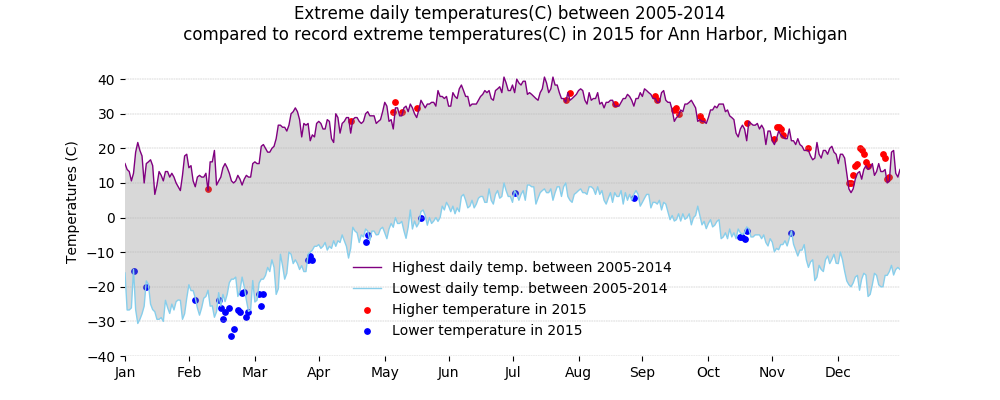

In [6]:
plt.figure(figsize=(10,4))

mon = t.month_s.unique()
h = np.linspace(start=0, stop=365, num=13)
h = np.round(h, 0)
h =h[:-1]

# dts = pd.to_datetime(df2014.Date)
# fig,ax = plt.subplots()

# plt.plot(t.num, t.Max, 'purple', t.num, t.Min, 'skyblue',linewidth=1.0)
plt.plot(t.num, t.Max, 'purple',linewidth=1.0, label="Highest daily temp. between 2005-2014")
plt.plot(t.num, t.Min, 'skyblue',linewidth=1.0, label="Lowest daily temp. between 2005-2014")


plt.scatter(t.num, last['maxi'], s=15, label="Higher temperature in 2015", color="red")
plt.scatter(t.num, last['mini'], s=15, label="Lower temperature in 2015", color="blue")



# plt.xlabel('T')
plt.ylabel('Temperatures (C)')
plt.title('Extreme daily temperatures(C) between 2005-2014 \n compared to record extreme temperatures(C) in 2015 for Ann Harbor, Michigan')

# ax = plt.gca()

plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())


plt.gca().fill_between(t.num, 
                       t.Max, t.Min, 
                       facecolor='gray', alpha = 0.3)
plt.gca().set_xticks(h)
plt.gca().set_xticklabels(mon)

plt.gca().set_ylim(ymin=-40, ymax=49)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(bbox_to_anchor=(0.50,0.35), frameon = False, shadow = False)

plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')

